<a href="https://colab.research.google.com/github/mukund166/ML_Lab_1BM22CS166/blob/main/1BM22CS166_Lab_9_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

k=1, inertia=300.00
k=2, inertia=54.17
k=3, inertia=18.03
k=4, inertia=12.32
k=5, inertia=10.12
k=6, inertia=7.28
k=7, inertia=6.01
k=8, inertia=5.13
k=9, inertia=4.43
k=10, inertia=3.97


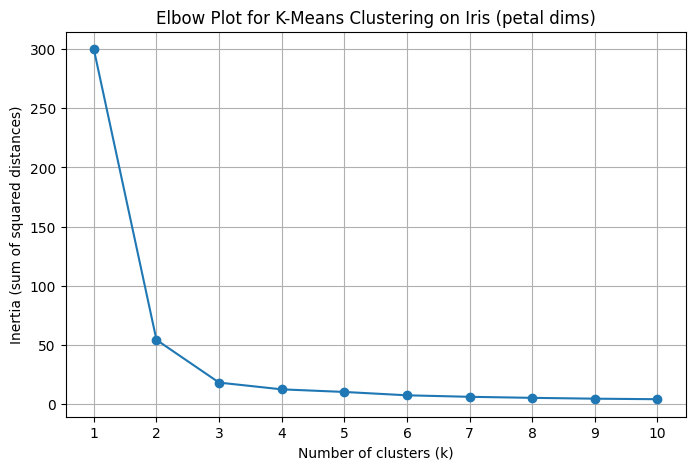

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
# 1. Load the data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# 2. Select only petal length and petal width
X = df[['petal length (cm)', 'petal width (cm)']].values

# 3. Optional: scale features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Compute inertia for k = 1 to 10
inertias = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)
    print(f"k={k}, inertia={km.inertia_:.2f}")

# 5. Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Plot for K-Means Clustering on Iris (petal dims)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (sum of squared distances)")
plt.xticks(K_range)
plt.grid(True)
plt.show()


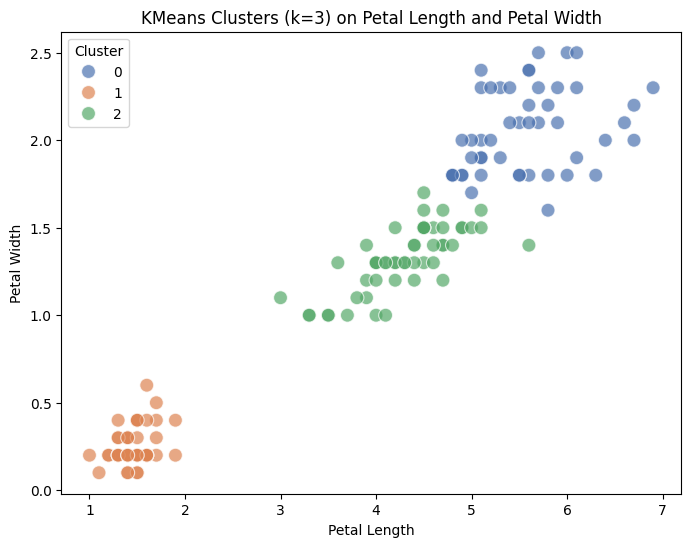

In [7]:
import seaborn as sns
k = 3
km = KMeans(n_clusters=k, random_state=42)
km.fit(X_scaled)

# Get the cluster labels
labels = km.labels_

# Add the labels to the dataframe for easier plotting
df['Cluster'] = labels

# Plot the data points with color by cluster label
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='Cluster', palette='deep', s=100, marker='o', alpha=0.7)
plt.title(f'KMeans Clusters (k={k}) on Petal Length and Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(title="Cluster")
plt.show()
